In [5]:
import pandas as pd
import matplotlib as mpl
import numpy as np

df = pd.read_csv("data.csv", header=0, sep=',', encoding='latin1')
df.head(5)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [374]:
orderedNo = df.loc[ (df['Quantity'] > 0)].count().InvoiceNo
canceledNo = df.loc[ (df['Quantity'] < 0) & (df['InvoiceNo'].str[:1] == 'C')].count().InvoiceNo
returnedNo = df.loc[ (df['Quantity'] < 0) & (df['InvoiceNo'].str[:1] != 'C')].count().InvoiceNo
totalNo = df.loc[ (df['Quantity'] != 0)].count().InvoiceNo

nodf = pd.Dataframe()

In [371]:
def set_unitPrice(index, df):

    idx = index
    print (idx)
    stkCode = df.iloc[idx].StockCode
    unitP = df.loc[(df.index < idx) & (df['StockCode'].str[:12] == stkCode) & (df['UnitPrice'] != 0.0)].tail(1)

    if (len(unitP) == 1) :
        #print ('unitPrice found: index(0)=', unitP.index[0], 'UnitPrice=', unitP.iloc[0].UnitPrice, ', stkCode=', stkCode, ', idx=', idx)
        df.loc[df.index == idx, 'UnitPrice'] =  unitP.iloc[0].UnitPrice
    #else :
    #    print ('not found UnitPrice index=', idx, 'stkCode=', stkCode)    
            

df.loc[(df['Quantity'] < 0) & (df['InvoiceNo'].str[:1] != 'C') & (df['UnitPrice'] == 0.0)].apply(
    lambda r: set_unitPrice(r.name, df), axis=1
)



TypeError: ("cannot do positional indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [InvoiceNo] of <class 'str'>", 'occurred at index 2406')

In [335]:
df['Sales']=df[['Quantity']].multiply(df['UnitPrice'], axis="index")
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,54.08


In [336]:
#df.loc[df.index == 7190, 'UnitPrice'] = df.iloc[5757].UnitPrice
df.loc[df.index == 74668]
#df.loc[df['InvoiceNo'] == n]
#df.loc[df['StockCode'] == '22184'].head(12)
#len(p)    
#df.loc[(df.index < 147791)]
#unitP = df.loc[(df.index < 147791) & (df['StockCode'] == '22184') & (df['UnitPrice'] != 0.0)].tail(11)
#unitP
#unitP.index[0]
#unitP.iloc[0].UnitPrice
#df.loc[(df['Quantity'] < 0) & (df['UnitPrice'] == 0.0) & (df['InvoiceNo'].str[:1] != '^C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
74668,542518,22184,NaN,-13,1/28/2011 12:17,8.5,NaN,United Kingdom,-110.5


In [355]:
months = ['12/31/2010', '1/31/2011', '2/29/2011', '3/31/2011', '4/30/2011', '5/31/2011', '6/30/2011', '7/31/2011', '8/31/2011', '9/30/2011', '10/31/2011', '11/30/2011']
sales = [df.loc[(pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.month == 12), 'Sales'].sum()]
for month in range(1, 12):
    sales.append(df.loc[(pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M').dt.month == month), 'Sales'].sum())
sales

[1163613.5899999999,
 532412.5000000001,
 480669.01,
 615465.8200000001,
 471062.95099999994,
 673501.49,
 636907.19,
 659558.081,
 667556.09,
 1001749.3819999999,
 975139.67,
 1424235.3900000001]

In [356]:
df2 = pd.DataFrame( 
    {'Month': months,
     'Sales': sales
    })
df2

,Month,Sales
0,12/31/2010,1163613.590
1,1/31/2011,532412.500
2,2/29/2011,480669.010
3,3/31/2011,615465.820
4,4/30/2011,471062.951
5,5/31/2011,673501.490
6,6/30/2011,636907.190
7,7/31/2011,659558.081
8,8/31/2011,667556.090
9,9/30/2011,1001749.382


In [45]:
d = {'Month': ['12/31/2010', '1/31/2011', '2/29/2011', '3/31/2011', '4/30/2011', '5/31/2011', '6/30/2011', '7/31/2011', '8/31/2011', '9/30/2011', '10/31/2011', '11/30/2011'], 
     'Sales': [1182625.03, 560000.26, 498062.65, 683267.08, 493207.12 ,723333.51, 691123.12,681300.11, 682680.51, 1019687.62, 1070704.67, 1461756.25]}
#df2 = pd.DataFrame( [1182625.03, 560000.26, 498062.65, 683267.08, 493207.12 ,723333.51, 691123.12, 681300.11, 682680.51, 1019687.62, 1070704.67, 1461756.25])
df2 = pd.DataFrame(d, columns = ['Month', 'Sales'])
df2

,Month,Sales
0,12/31/2010,1182625.03
1,1/31/2011,560000.26
2,2/29/2011,498062.65
3,3/31/2011,683267.08
4,4/30/2011,493207.12
5,5/31/2011,723333.51
6,6/30/2011,691123.12
7,7/31/2011,681300.11
8,8/31/2011,682680.51
9,9/30/2011,1019687.62


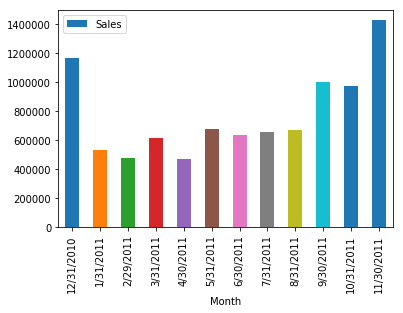

In [359]:
df2.plot(kind='bar', x=df2['Month'], y='Sales')

In [1]:
df2.plot(kind='bar', x=df2['Month'], y='Sales')


NameError: name 'df2' is not defined

In [3]:
from pandas.plotting._misc import (scatter_matrix, radviz,
                                   andrews_curves, bootstrap_plot,
                                   parallel_coordinates, lag_plot,
                                   autocorrelation_plot)
from pandas.plotting._core import boxplot
from pandas.plotting._style import plot_params
from pandas.plotting._tools import table

from pandas.plotting._converter import \
    register as register_matplotlib_converters
from pandas.plotting._converter import \
    deregister as deregister_matplotlib_converters


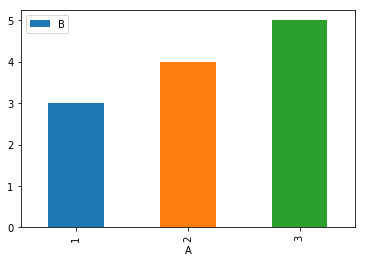

In [9]:
df2 = pd.DataFrame({'A': [1,2,3], 'B':[3,4,5]})
df2
df2.plot(kind='bar', x='A', y='B')
